Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib
the w is [-9.  1.  4.]
cost of time is 0.055308491148025496


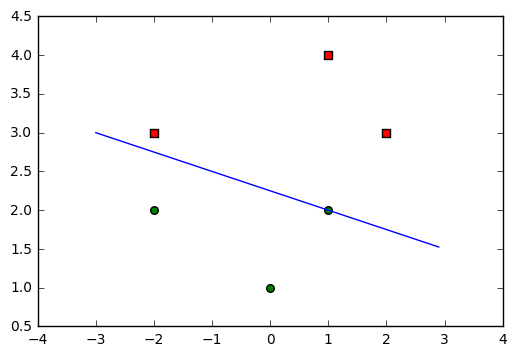

In [45]:
%pylab
%matplotlib inline

#  对于线性可分的数据，使用PLA正规方法，对于线性不可分的可使用Pocket Algorithm

import operator
import time

# 注意这里是已经加过偏置值了

TRAIN_DATA = array([[1,1,4],
                    [1,2,3],
                    [1,-2,3],
                    [1,-2,2],
                    [1,0,1],
                    [1,1,2]])
LABEL = array([1,1,1,-1,-1,-1])

TEST_DATA = array([[1,1,1],
                   [1,2,0],
                   [1,2,4],
                   [1,1,3]])
# 符号函数
def signed(X):
    return 1 if X > 0 else -1

# PLA主演算法
def pla(data, label):
    m, n = shape(data)
    w = ones(n) # 权值的维度, 全部初始化为1
    while True:  # 不可能是一次循环，每一次循环的过程中都可能发现错误
        iscompleted = True
        for i in range(m): # 用新的权值对每个点进行验证
            if(signed(dot(data[i],w)) != label[i]):
                iscompleted = False
                w += (label[i]*data[i])
        if iscompleted:
            break
    return w

def validate(inX, w):
    result = signed(dot(inX*w))
    return 1 if result>0 else -1

def plotBestFit(w, data, label):
    # 正向样本的点
    x1_pos, x2_pos = data[label==1, 1], data[label==1, 2]
    x1_neg, x2_neg = data[label==-1, 1],data[label==-1, 2]
    
    figure()
    scatter(x1_pos, x2_pos, s=30, c='red', marker='s')
    scatter(x1_neg, x2_neg, s=30, c='green')
    x = arange(-3.0, 3.0, 0.1)
    y = (-w[0]-w[1] * x)/w[2] # w*X = 0 为decision boundary
    plot(x, y, 'b-')
    
if __name__ == '__main__':
    start = time.clock()
    
    w = pla(TRAIN_DATA, LABEL)
    plotBestFit(w, TRAIN_DATA, LABEL)
    print('the w is {0}'.format(w))
    
    end = time.clock()
    print('cost of time is {0}'.format(end-start))

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib
[ 0.          0.20176998 -3.34020447]
cost of time is 0.06500363349914551


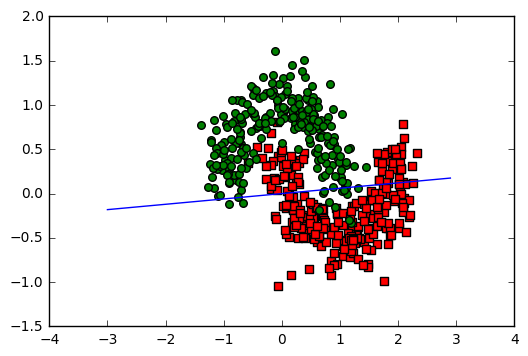

In [94]:

# Pocket Algorithm 处理线性不可分的问题
%pylab
%matplotlib inline

import time
import sklearn
from sklearn import datasets

X, y = datasets.make_moons(500,noise=0.2)#创造二分类的数据集 

# 符号函数
def signed(rs):
    return 1 if rs >0 else -1

# Pocket Algorithm
def Pocket(X, y):
    m,n  = shape(X)
    
    # add bias
    X = column_stack((ones(m), X))
    y = choose(y==1,(-1,y)) # 在PLA中由于需要通过y*x矫正w，因此必须使用用-1和1来表示分类
    w = _w = ones(n+1) # 加1 是因为X扩展了一列; w是初始值，_w 用于保存历史值
    
    # 对m个样本进行扫描，扫描过程中进行w的纠正，并比较w引起的错误个数
    for i in range(m):
        h = signed(dot(X[i], w))
        if(h != y[i]):
            w = _w + y[i] * X[i] # 不断更新的权值
            _w = cmp_w(X, y, w, _w) # 选择较少错误的抓在手里
    return _w

def cmp_w(data, label, w1, w2):
    h_w1 = dot(data, w1) # hypothesis 
    h_w2 = dot(data, w2)
    
    return w1 if sum(h_w1== label) > sum(h_w2 == label) else w1

def plotBestFit(w, data, label):
    # 正向样本的点
    x1_pos, x2_pos = data[label==1, 0], data[label==1, 1]
    x1_neg, x2_neg = data[label==0,0],data[label==0, 1]

    figure()
    scatter(x1_pos, x2_pos, s=30, c='red', marker='s')
    scatter(x1_neg, x2_neg, s=30, c='green')
    x = arange(-3.0, 3.0, 0.1)
    y = (-w[0]-w[1] * x)/w[2] # w*X = 0 为decision boundary
    plot(x, y, 'b-')

if __name__ == '__main__':
    start = time.time()
    w = Pocket(X, y)
    print(w)
    plotBestFit(w, X, y)
    end = time.time()
    
    print('cost of time is {0}'.format(end-start))

array([0, 1, 0, 1, 1, 1, 1, 0, 0, 0], dtype=int64)